<a href="https://colab.research.google.com/github/joaohs1/ColabJH/blob/main/Projeto_Analise_de_dados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Projeto ENEM - O que os dados socioeconômicos do ENEM dizem sobre a disparidade das notas?

# **1.  Entendimento do problema** <p>
O Enem (exame nacional do ensino médio) é uma prova aplicada desde 1998 que tem como objetivo avaliar o desempenho de alunos que finalizaram a educação básica.Desde 2009 é composto por quatro matérias e uma redação.
Em 2022, cerca de 2,3 milhões de pessoas realizaram as provas, e a missão desse projeto é te mostrar com os dados socioeconômicos, porque há tanta disparidade nas notas das provas respondendo as seguintes perguntas:

*a) Como a renda, escolaridade, idade e região interferem na nota?*

*b) Qual dessas características está mais atrelada ao bom desempenho no exame?*

# **2.	Aquisição dos dados** <p>


Todos os dados utilizados nesse projeto são de um dataset com filtro e amostra de 99% de confiança, disponibilizado pelo curso “Ciência de Dados para Finanças e Economia”, retirados do microdados do ENEM de 2019 que está disponível para download no site oficial do ENEM (https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem).

Vamos utilizar 3 bases de dados do dataset indicado acima:

1)  Dados_Enem

2)  Dados_Regionais

3)  Dicionario_Enem

In [ ]:
# importando bibliotecas

import pandas as pd
import numpy as np

# Lib para visualizaçõse graficas
import matplotlib.pyplot as plt
import seaborn as sns

#avisos
import warnings
warnings.filterwarnings('ignore')

#**3. Limpeza e Cruzamento de dados**

Vamos compreender como é a estrutura dos dados e criar uma base única, seguindo os passos:

1. Verificar dimensão dos Dados (shape)
2. Analisar primeiros/últimos registros (head/tail)
3. Analisar formato dos dados (info)
4. Cruzar os dados (pd.merge)
5. Selecionar colunas essenciais (drop/rename)
6. Verificar campos nullos (isnull) <p>

In [ ]:
# Dados do ENEM
base_dados = pd.read_excel('Dados_Enem - Estudo Economico.xlsx')

# Dados regionais
base_regiao = pd.read_csv('Dados_Regionais.csv', sep=';')

# Dicionario
tab_escola = pd.read_excel('Dicionario_Enem.xlsx', 'Tab_Escola')
tab_renda = pd.read_excel('Dicionario_Enem.xlsx', 'Tab_Renda')

In [ ]:
# Analise base ENEM
# Verificar a dimensão
print('Base de dados contem:')
print(f'Total de linhas: {base_dados.shape[0]}')
print(f'Total de colunas: {base_dados.shape[1]}')

Base de dados contem:
Total de linhas: 9970
Total de colunas: 9


In [ ]:
# Verificando os primeiros registros
base_dados.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280
1,PE,18,2,B,375.8,465.8,531.9,386.1,600
2,SP,18,2,D,395.9,400.4,493.7,516.8,640
3,BA,18,3,K,712.9,711.7,665.5,731.5,940
4,BA,18,2,B,346.3,494.9,519.8,391.8,640


In [ ]:
# Ultimos registros
base_dados.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
9965,RJ,17,2,I,523.5,567.5,590.9,550.1,600
9966,MG,25,2,B,411.0,549.2,545.5,529.7,380
9967,DF,18,2,G,547.3,551.5,546.5,683.1,760
9968,SP,18,2,H,549.8,532.9,566.5,522.5,640
9969,SC,17,2,D,437.9,498.6,561.4,431.3,600


In [ ]:
# Informação da base de dados - Entender se precisa fazer transformações(no caso não é necessário)
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  9970 non-null   object 
 1   NU_IDADE          9970 non-null   int64  
 2   TP_ESCOLA         9970 non-null   int64  
 3   Q006              9970 non-null   object 
 4   NU_NOTA_CN        9970 non-null   float64
 5   NU_NOTA_CH        9970 non-null   float64
 6   NU_NOTA_LC        9970 non-null   float64
 7   NU_NOTA_MT        9970 non-null   float64
 8   NU_NOTA_REDACAO   9970 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 701.1+ KB


In [ ]:
#Analises com a base Região
#Dimensão
print('Base de dados contem:')
print(f'Total de linhas: {base_regiao.shape[0]}')
print(f'Total de colunas: {base_regiao.shape[1]}')

Base de dados contem:
Total de linhas: 27
Total de colunas: 4


In [ ]:
#Verificar
base_regiao.head()

,Estado,Sigla,Capital,Região
0,Roraima,RR,Boa Vista,Norte
1,Amapá,AP,Macapá,Norte
2,Amazonas,AM,Manaus,Norte
3,Pará,PA,Belém,Norte
4,Acre,AC,Rio Branco,Norte


In [ ]:
#Analises com a base escola
# Dimensão
print('Base de dados contem:')
print(f'Total de linhas: {tab_escola.shape[0]}')
print(f'Total de colunas: {tab_escola.shape[1]}')

Base de dados contem:
Total de linhas: 4
Total de colunas: 2


In [ ]:
# Verificar
tab_escola.head()

,Id,Opção
0,1,Não Respondeu
1,2,Pública
2,3,Privada
3,4,Exterior


In [ ]:
#Analises com a base renda
# Dimensão
print('Base de dados contem:')
print(f'Total de linhas: {tab_renda.shape[0]}')
print(f'Total de colunas: {tab_renda.shape[1]}')

Base de dados contem:
Total de linhas: 17
Total de colunas: 2


In [ ]:
# Verificar
tab_renda.head()

,Id,Renda
0,A,Nenhuma renda.
1,B,"Até R$ 998,00."
2,C,"De R$ 998,01 até R$ 1.497,00."
3,D,"De R$ 1.497,01 até R$ 1.996,00."
4,E,"De R$ 1.996,01 até R$ 2.495,00."


In [ ]:
## Cruzamento da base de DADOS##

In [ ]:
#Renomear coluna para padronizar tabelas
base_regiao.rename(columns={'Sigla':'SG_UF_RESIDENCIA'}, inplace = True)

In [ ]:
# Cruzamento (Merge)
base_cruzada = pd.merge(base_dados,base_regiao, on =['SG_UF_RESIDENCIA'], how='outer')

# verificação

base_cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Estado,Capital,Região
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Rio de Janeiro,Rio de Janeiro,Sudeste
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Rio de Janeiro,Rio de Janeiro,Sudeste
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Rio de Janeiro,Rio de Janeiro,Sudeste
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Rio de Janeiro,Rio de Janeiro,Sudeste
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Rio de Janeiro,Rio de Janeiro,Sudeste


In [ ]:
# Retirando colunas

base_cruzada.drop( columns=['Estado','Capital'], inplace = True)

# verificação

base_cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Sudeste
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Sudeste
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Sudeste
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Sudeste
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Sudeste


In [ ]:
# renomear colunas - Escola
tab_escola.rename(columns={'Id':'TP_ESCOLA'}, inplace= True)


In [ ]:
#Cruzamento
base_cruzada = pd.merge(base_cruzada,tab_escola, on=['TP_ESCOLA'], how = 'outer')

#Verificação

base_cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública
1,RJ,19.0,2,B,547.5,551.1,549.1,585.1,840.0,Sudeste,Pública
2,RJ,17.0,2,G,601.2,652.2,635.6,734.1,640.0,Sudeste,Pública
3,RJ,20.0,2,E,456.9,547.1,592.0,532.4,480.0,Sudeste,Pública
4,RJ,17.0,2,K,411.0,580.9,507.6,560.2,520.0,Sudeste,Pública


In [ ]:
# renomear colunas - renda

tab_renda.rename( columns= {'Id':'Q006'}, inplace = True)

In [ ]:
# cruzamento de dados RENDA

base_cruzada = pd.merge(base_cruzada, tab_renda,on =['Q006'], how='outer')

#Verificandi

base_cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."


#**4. Exploração dos dados**

Vamos aplicar conceitos estatísticos nos dados para extrair insights



1.   Verificar campos da base (nunique)
2.   Analisar estatística descritiva (describe/mode/var/skew/kurtosis)
3.   Analisar comportamentos (value_counts/cumsum/sort_values)
4.   Analisar correlação entre os dados (corr(pearson,spearman,kendall))




In [ ]:
# campos nulos
base_cruzada.isnull().sum()

SG_UF_RESIDENCIA    2
NU_IDADE            2
TP_ESCOLA           0
Q006                2
NU_NOTA_CN          2
NU_NOTA_CH          2
NU_NOTA_LC          2
NU_NOTA_MT          2
NU_NOTA_REDACAO     2
Região              2
Opção               0
Renda               2
dtype: int64

In [ ]:
# campos unicos
base_cruzada.nunique()

SG_UF_RESIDENCIA      27
NU_IDADE              30
TP_ESCOLA              4
Q006                  17
NU_NOTA_CN          2947
NU_NOTA_CH          3126
NU_NOTA_LC          2613
NU_NOTA_MT          3673
NU_NOTA_REDACAO       44
Região                 5
Opção                  4
Renda                 17
dtype: int64

In [ ]:
# describe
base_cruzada.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_IDADE,9970.0,17.717452,1.374614,14.0,17.0,18.0,18.000,52.0
TP_ESCOLA,9972.0,2.137184,0.344641,1.0,2.0,2.0,2.000,4.0
NU_NOTA_CN,9970.0,476.110752,76.004605,0.0,415.3,469.3,532.600,789.9
NU_NOTA_CH,9970.0,507.826429,80.285119,0.0,449.3,511.0,566.400,755.5
NU_NOTA_LC,9970.0,520.288385,63.257290,0.0,483.3,526.1,564.500,727.9
NU_NOTA_MT,9970.0,527.776299,108.320815,359.0,440.5,508.1,602.275,985.0
NU_NOTA_REDACAO,9970.0,588.860582,185.308330,0.0,500.0,600.0,700.000,980.0


In [ ]:
# moda

base_cruzada.mode().transpose()

,0,1,2
SG_UF_RESIDENCIA,SP,NaN,NaN
NU_IDADE,17.0,NaN,NaN
TP_ESCOLA,2.0,NaN,NaN
Q006,B,NaN,NaN
NU_NOTA_CN,446.0,NaN,NaN
NU_NOTA_CH,518.2,NaN,NaN
NU_NOTA_LC,498.2,509.1,565.7
NU_NOTA_MT,465.0,NaN,NaN
NU_NOTA_REDACAO,600.0,NaN,NaN
Região,Sudeste,NaN,NaN


In [ ]:
# analise
base_cruzada['SG_UF_RESIDENCIA'].value_counts(normalize=True).cumsum()

SP    0.182849
CE    0.280040
MG    0.375025
RJ    0.442828
BA    0.507623
PE    0.561384
PR    0.603611
RS    0.645537
PA    0.686359
MA    0.724273
GO    0.755366
SC    0.786259
ES    0.811133
PB    0.835206
PI    0.857573
AM    0.877633
DF    0.896790
RN    0.915747
MT    0.931795
MS    0.946439
AL    0.960883
SE    0.973019
RO    0.982247
TO    0.989168
AP    0.994885
AC    0.998696
RR    1.000000
Name: SG_UF_RESIDENCIA, dtype: float64

In [ ]:
# analise UFs
base_cruzada['SG_UF_RESIDENCIA'].value_counts(normalize=True).cumsum().head()

SP    0.182849
CE    0.280040
MG    0.375025
RJ    0.442828
BA    0.507623
Name: SG_UF_RESIDENCIA, dtype: float64

In [ ]:
# analise Região
base_cruzada['Região'].value_counts(normalize=True).cumsum()

Sudeste         0.370512
Nordeste        0.716148
Sul             0.831194
Norte           0.919057
Centro-oeste    1.000000
Name: Região, dtype: float64

In [ ]:
# analise de renda
base_cruzada['Renda'].value_counts(normalize=True)

Até R$ 998,00.                       0.250050
De R$ 998,01 até R$ 1.497,00.        0.248746
De R$ 1.996,01 até R$ 2.495,00.      0.095085
De R$ 1.497,01 até R$ 1.996,00.      0.087663
De R$ 2.994,01 até R$ 3.992,00.      0.069509
Nenhuma renda.                       0.042227
De R$ 3.992,01 até R$ 4.990,00.      0.041625
De R$ 2.495,01 até R$ 2.994,00.      0.039218
De R$ 4.990,01 até R$ 5.988,00.      0.036810
De R$ 5.988,01 até R$ 6.986,00.      0.016750
Mais de R$ 19.960,00.                0.012337
De R$ 9.980,01 até R$ 11.976,00.     0.011635
De R$ 11.976,01 até R$ 14.970,00.    0.011535
De R$ 6.986,01 até R$ 7.984,00.      0.010331
De R$ 8.982,01 até R$ 9.980,00.      0.009629
De R$ 7.984,01 até R$ 8.982,00.      0.008425
De R$ 14.970,01 até R$ 19.960,00.    0.008425
Name: Renda, dtype: float64

In [ ]:
# experimento para o grafico
base_cruzada['Renda'][0].split('R$')[-1].replace('.','').replace(',','.').strip()

'1497.00'

In [ ]:
# inserindo nova coluna para melhor visualização nos graficos

#função para tratar texto
def retornando_valor(valor_linha):
  # Atribuir o valor que irá chegar
  tratamento = str(valor_linha)

  if tratamento == 'Nenhuma renda.':
      tratamento=0
  else:

    #Quebrar o texto pelo simbolo real e pegar a ultima posição
    tratamento = tratamento.split('R$')[-1]

    #Substituir o ponto por nada
    tratamento = tratamento.replace('.','')

    #Subistituir a virgula por ponto
    tratamento = tratamento.replace(',','.')

    #limpar espaços
    tratamento = tratamento.strip()

    #retornar o valor
  return tratamento
#Criar uma nova coluna e passar a função como parametro
base_cruzada['Salário_max'] = base_cruzada['Renda'].apply(retornando_valor)

#Verificar
base_cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda,Salário_max
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.00
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.00
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.00
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.00
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.00


In [ ]:
# verificando se há anomalias

base_cruzada['Salário_max'].value_counts().index

Index([  '998.00',  '1497.00',  '2495.00',  '1996.00',  '3992.00',          0,
        '4990.00',  '2994.00',  '5988.00', '19960.00',  '6986.00', '11976.00',
       '14970.00',  '7984.00',  '9980.00',  '8982.00',      'nan'],
      dtype='object')

In [ ]:
# Escola x Privada

base_cruzada['TP_ESCOLA'].value_counts(normalize=True)

2    0.862716
3    0.137084
1    0.000100
4    0.000100
Name: TP_ESCOLA, dtype: float64

In [ ]:
# Idade

base_cruzada['NU_IDADE'].value_counts(normalize = True).sort_index()

14.0    0.000100
15.0    0.000502
16.0    0.020963
17.0    0.471414
18.0    0.386359
19.0    0.081444
20.0    0.022668
21.0    0.006921
22.0    0.002708
23.0    0.001906
24.0    0.001103
25.0    0.000401
26.0    0.000401
27.0    0.000301
28.0    0.000301
29.0    0.000100
30.0    0.000301
31.0    0.000201
32.0    0.000100
33.0    0.000401
35.0    0.000100
36.0    0.000201
37.0    0.000100
38.0    0.000100
39.0    0.000201
40.0    0.000201
42.0    0.000100
44.0    0.000100
45.0    0.000201
52.0    0.000100
Name: NU_IDADE, dtype: float64

In [ ]:
# analise média dos salarios pela nota
base_cruzada.groupby(by=['Salário_max']).mean()['NU_NOTA_MT']

Salário_max
0           470.919477
11976.00    644.905172
1497.00     501.609355
14970.00    675.532174
1996.00     533.029748
19960.00    705.170048
2495.00     527.068038
2994.00     561.032737
3992.00     564.731313
4990.00     587.264096
5988.00     602.924796
6986.00     615.297605
7984.00     625.279612
8982.00     635.408333
998.00      480.585760
9980.00     638.997917
nan                NaN
Name: NU_NOTA_MT, dtype: float64

In [ ]:
# Retirar valores NULOS

base_cruzada.dropna(inplace=True)

In [ ]:
#conversão para numerico
base_cruzada['Salário_max'] = pd.to_numeric(base_cruzada['Salário_max'])

In [ ]:
# correlações
base_cruzada.corr()

,NU_IDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Salário_max
NU_IDADE,1.000000,-0.102839,-0.129140,-0.150177,-0.180671,-0.158747,-0.159441,-0.107877
TP_ESCOLA,-0.102839,1.000000,0.392997,0.355877,0.321163,0.410064,0.336119,0.535349
NU_NOTA_CN,-0.129140,0.392997,1.000000,0.682196,0.657025,0.668829,0.533110,0.421295
NU_NOTA_CH,-0.150177,0.355877,0.682196,1.000000,0.758039,0.628086,0.570516,0.394707
NU_NOTA_LC,-0.180671,0.321163,0.657025,0.758039,1.000000,0.605871,0.582152,0.385902
NU_NOTA_MT,-0.158747,0.410064,0.668829,0.628086,0.605871,1.000000,0.520586,0.456900
NU_NOTA_REDACAO,-0.159441,0.336119,0.533110,0.570516,0.582152,0.520586,1.000000,0.321183
Salário_max,-0.107877,0.535349,0.421295,0.394707,0.385902,0.456900,0.321183,1.000000


In [ ]:
##base_cruzada.iloc[9970, :]

In [ ]:
base_cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda,Salário_max
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0


In [ ]:
base_cruzada.dropna().shape

(9970, 13)

# **5. EDA - análise exploratória de dados**

Aqui vamos fazer algumas plotagens dos dados, para criar insights e tentar responder as perguntas feitas logo no início do projeto, como:

a)	Como a renda, escolaridade, idade e região interferem na nota?

b)	Após realizar a análise acima responder qual dessas características está mais atrelada ao bom desempenho nas provas


Vamos iniciar essa etapa fazendo uma análise geral com a correlação dos dados com HEATMAP.

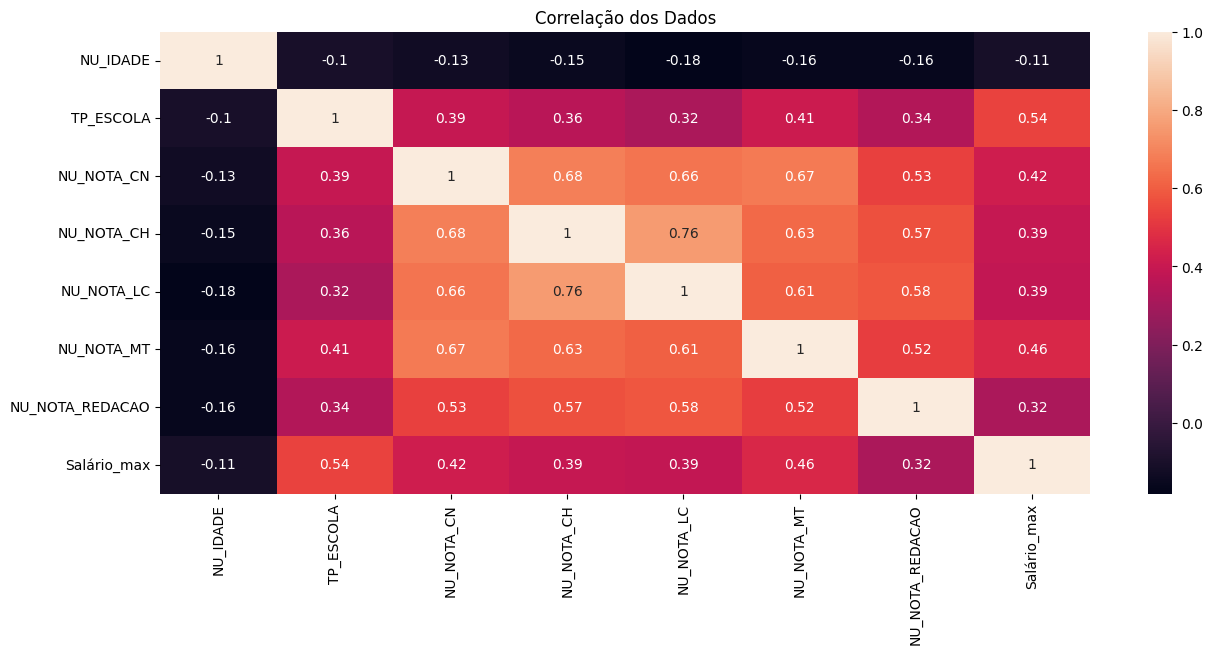

In [ ]:
# HeatMAP dos dados

plt.figure(figsize=(15,6))
plt.title('Correlação dos Dados')

correlacao = base_cruzada.corr()
sns.heatmap(correlacao, annot=True);

Se correlacionarmos as notas com renda e tipo da escola, vemos que a nota de matemática tem maior interação com esses itens. Sendo assim para ser mais direto ao ponto podemos utilizar apenas a nota de matemática para nossas analises.

Mas antes disso, vamos procurar a resposta de como a renda interfere em todas as notas, para isso, o BoxPlot pode ser um grande aliado.

 Com isso, podemos concluir se realmente podemos utilizar apenas a nota de matemática para nossas analises, e ver mais detalhadamente como é essa correlação entre NOTA x RENDA.


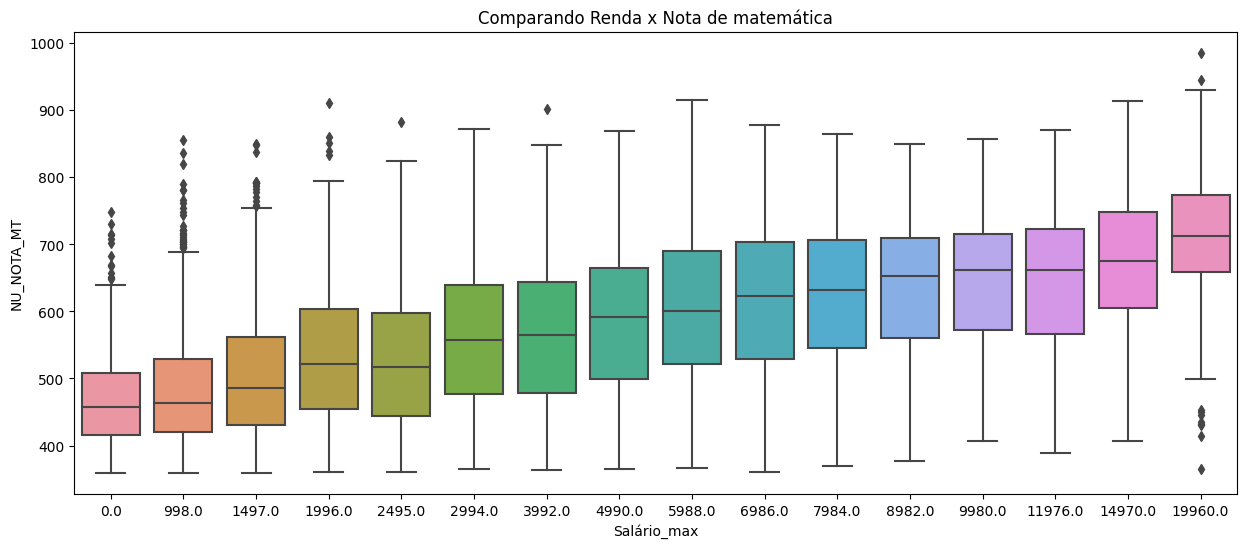

In [ ]:
# Boxplot relacionando salario com nota de matemática

plt.figure(figsize=(15,6))
plt.title('Comparando Renda x Nota de matemática')
sns.boxplot(data=base_cruzada, x ='Salário_max', y ='NU_NOTA_MT');

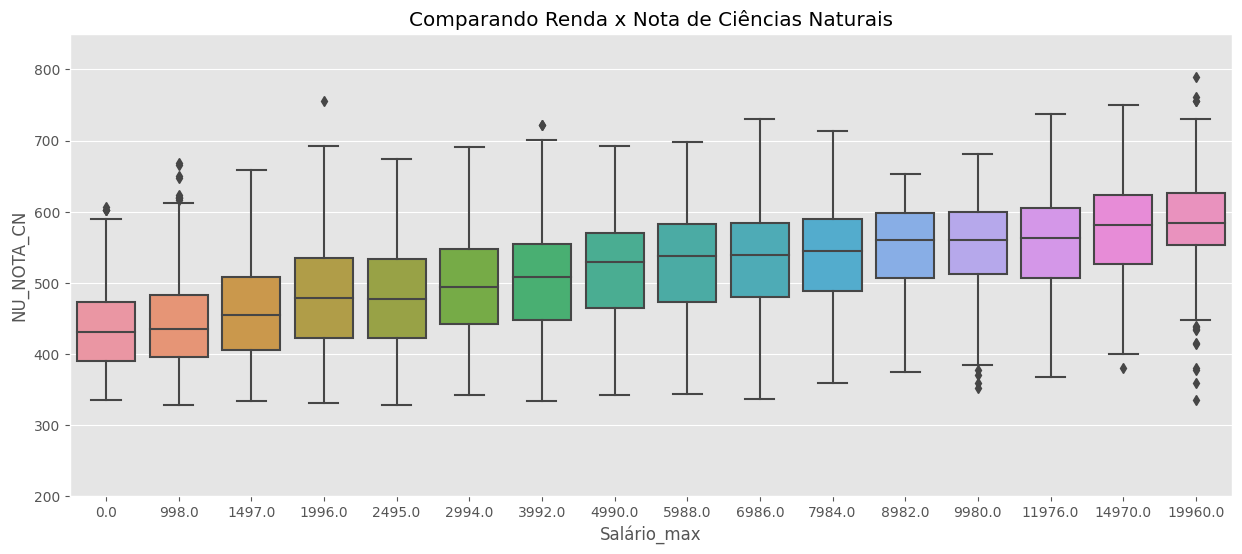

In [ ]:
# Boxplot relacionando salario com nota de Ciências Naturais

plt.figure(figsize=(15,6))
plt.title('Comparando Renda x Nota de Ciências Naturais')
plt.ylim(200, 850)
sns.boxplot(data=base_cruzada, x ='Salário_max', y ='NU_NOTA_CN');

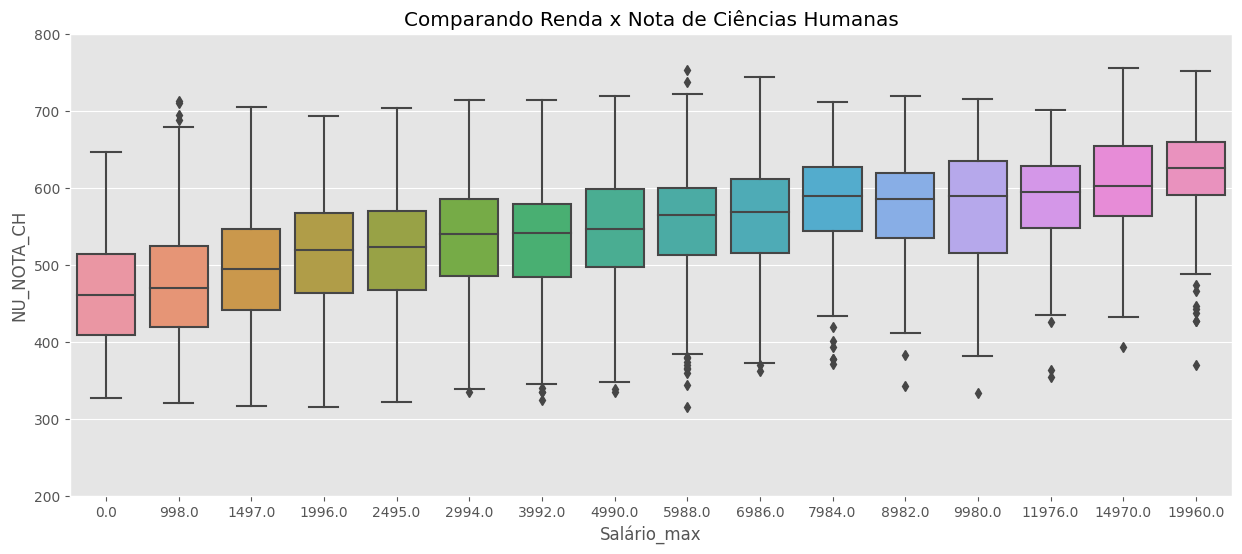

In [ ]:
# Boxplot relacionando salario com nota de Ciências Humanas

plt.figure(figsize=(15,6))
plt.title('Comparando Renda x Nota de Ciências Humanas')
plt.ylim(200, 800)
sns.boxplot(data=base_cruzada, x ='Salário_max', y ='NU_NOTA_CH');

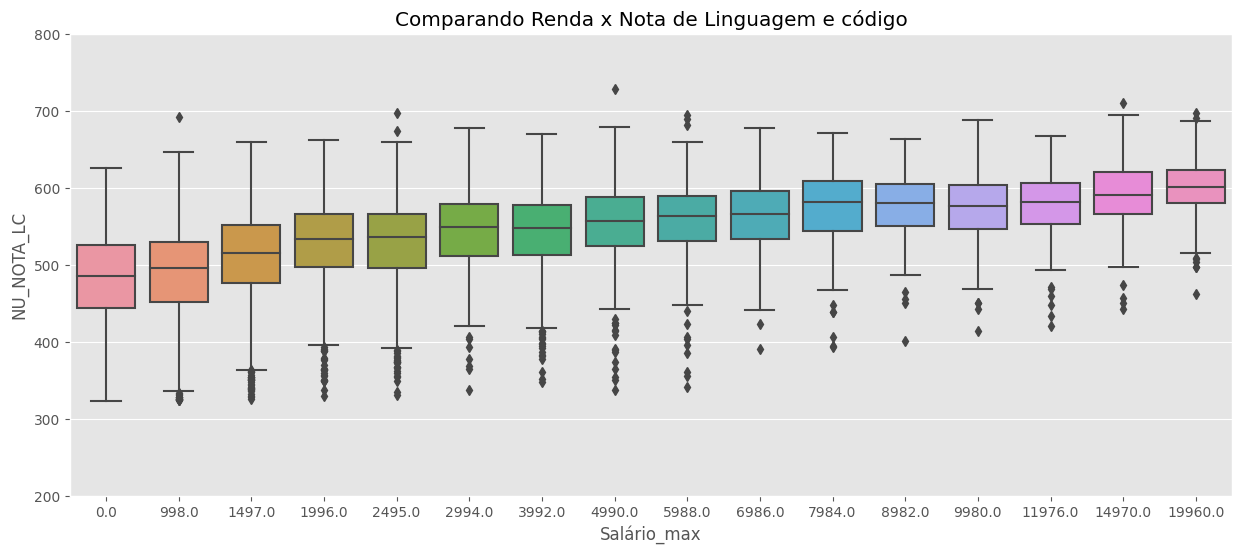

In [ ]:
# Boxplot relacionando salario com nota de Linguagem e código

plt.figure(figsize=(15,6))
plt.title('Comparando Renda x Nota de Linguagem e código')
plt.ylim(200, 800)
sns.boxplot(data=base_cruzada, x ='Salário_max', y ='NU_NOTA_LC',  );

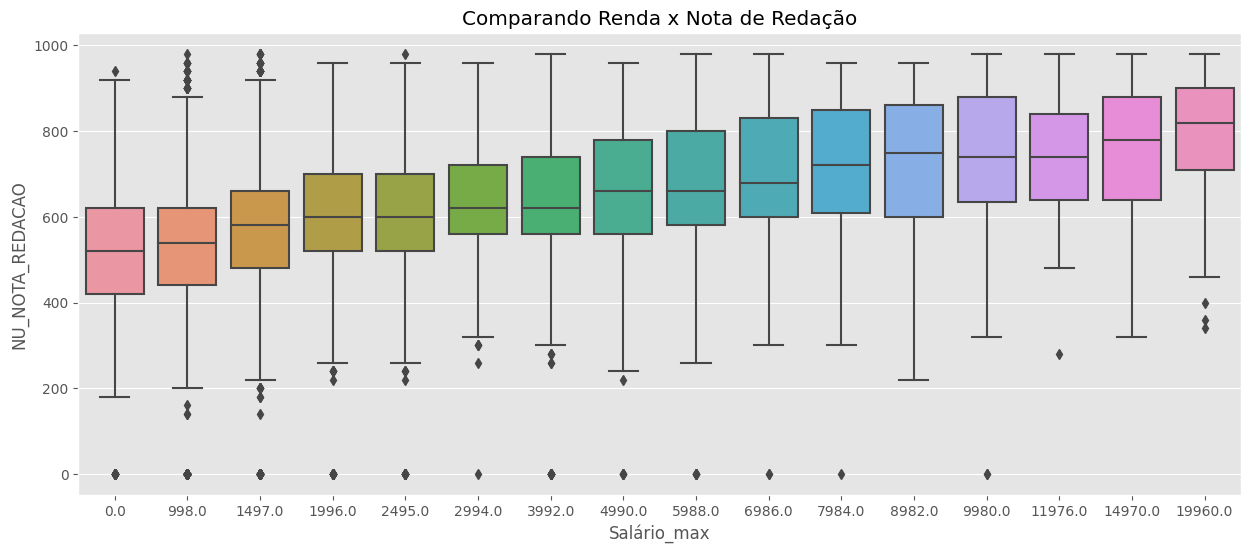

In [ ]:
# Boxplot relacionando salario com nota de Redação

plt.figure(figsize=(15,6))
plt.title('Comparando Renda x Nota de Redação')
sns.boxplot(data=base_cruzada, x ='Salário_max', y ='NU_NOTA_REDACAO');

Concluímos que independente da matéria abordada, conforme a renda aumenta o desempenho nas notas também cresce. Mas com a nota de matemática podemos ver uma grande diferença nessa correlação. Sendo assim, nas próximas análises utilizaremos apenas a nota de matemática.

Agora vamos levantar um histograma da idade dos participantes:

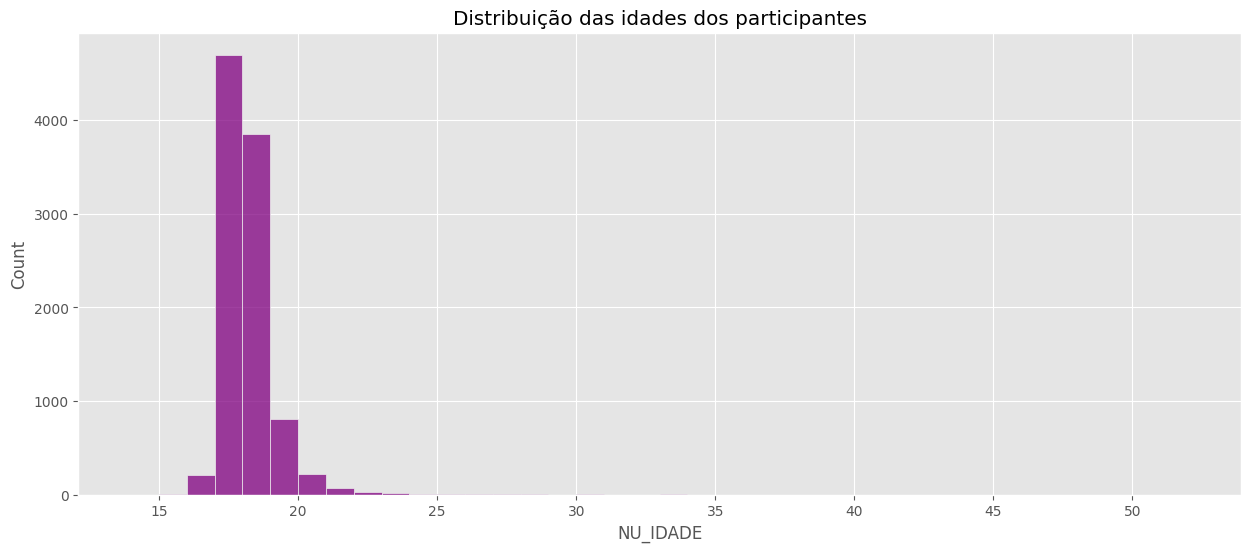

In [ ]:
# Histograma das idades

plt.figure(figsize=(15,6))
plt.title('Distribuição das idades dos participantes')


sns.histplot(data=base_cruzada, x = 'NU_IDADE', binwidth=1, color = 'purple');

Observamos que a maioria dos participantes são jovens de 17 até 19 anos.

Agora vamos fazer análise por regiões, primeiro vamos identificar quantos participantes tem por região, e depois iremos ver a média da nota de matemática por região, para entender se existe a relação número de pessoas X Região X Nota de matemática.

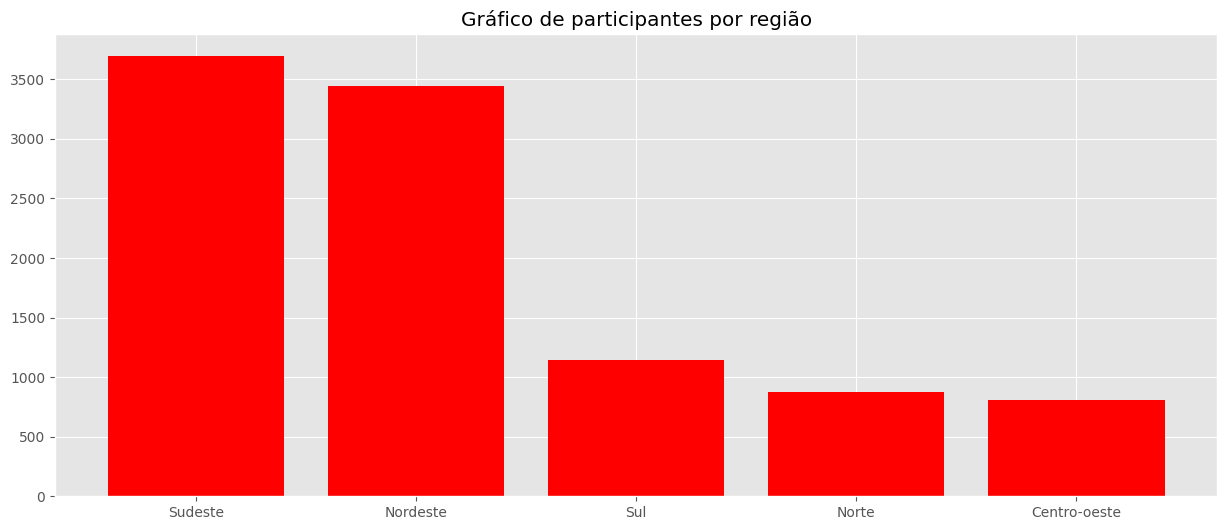

In [ ]:
# Gráfico de participantes por região
analise_regiao = base_cruzada['Região'].value_counts()

plt.figure(figsize=(15,6))
plt.title('Gráfico de participantes por região')


plt.bar(analise_regiao.index, analise_regiao, color='red');


Vamos ver a média de matemática por região.

<BarContainer object of 5 artists>

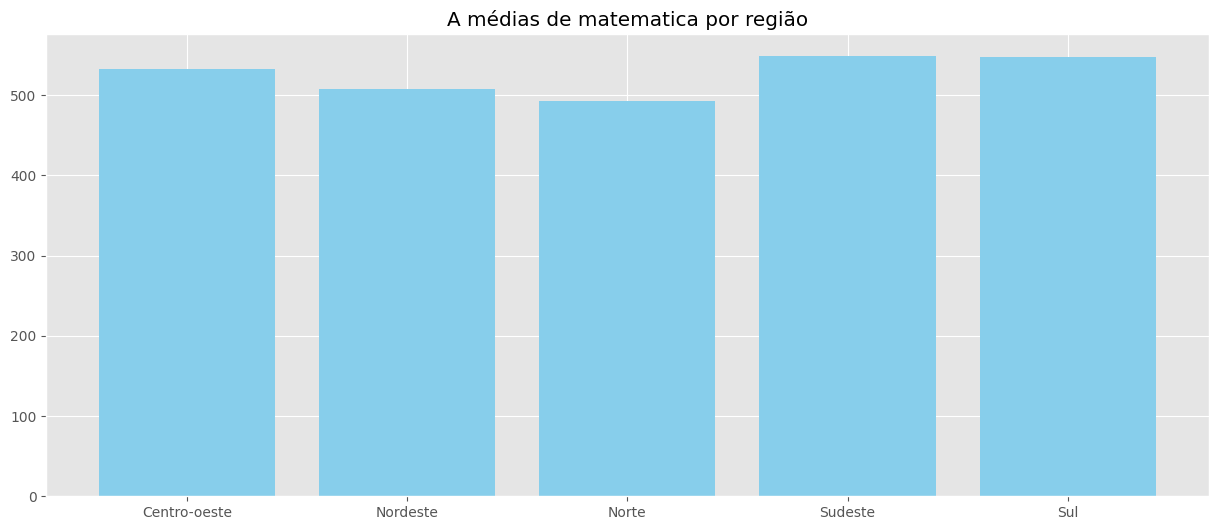

In [ ]:
#Grafico de barra sobre médias de matematica por região
analise_media = base_cruzada.groupby(by=['Região']).mean()['NU_NOTA_MT']

plt.figure(figsize=(15,6))
plt.title('A médias de matematica por região')
plt.bar(analise_media.index, analise_media, color='skyblue')



Observamos que todas as regiões estão homogêneas, e o número de participantes não está tão correlacionado a ponto de destacar ou diminuir a nota.



Vamos para nossa última análise, entender se o tipo de escola influencia no desempenho (conseguimos fazer uma análise geral, visto que as regiões estão bem homogêneas).

In [ ]:
analise_escola = base_cruzada.groupby(by=['Opção']).mean()['NU_NOTA_MT']
analise_escola

Opção
Privada    639.201317
Pública    510.071080
Name: NU_NOTA_MT, dtype: float64

<BarContainer object of 2 artists>

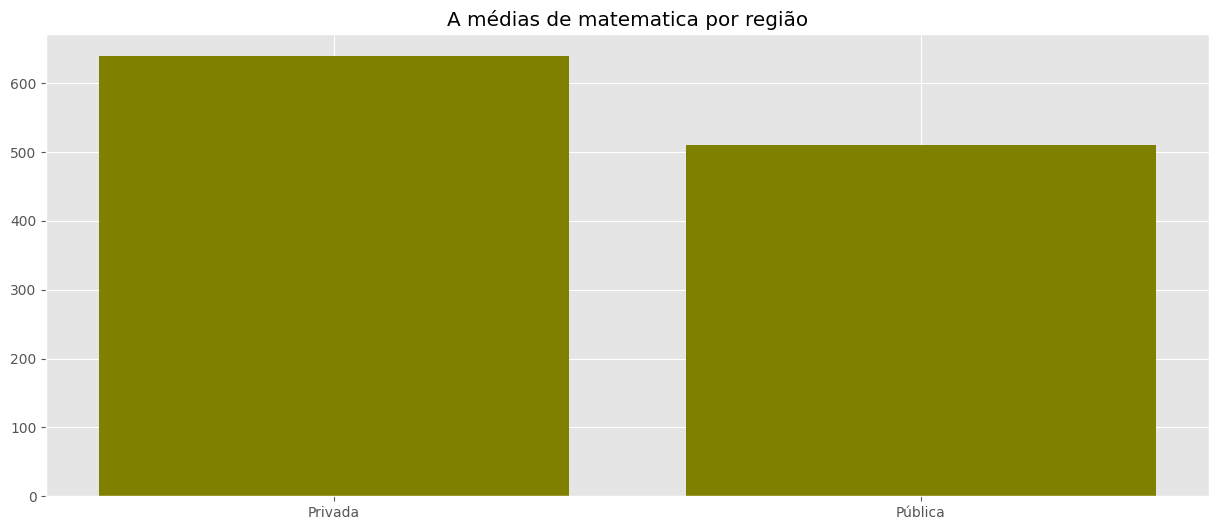

In [ ]:
#Grafico de barra sobre médias de matematica por tipo de escola

plt.figure(figsize=(15,6))
plt.title('A médias de matematica por região')
plt.bar(analise_escola.index, analise_escola, color='olive')

No geral, concluímos que o participante de escola particular consegue obter um maior desempenho na prova.

Após todas essas análises, pontualmente fomos chegando a conclusão de nossas perguntas.

Sendo assim, vamos para os últimos passos desse projeto.


# **4. Relatório da análise**

Nesse relatório vamos colocar as visualizações mais importantes e com ele iremos avaliar e concluir esse projeto.

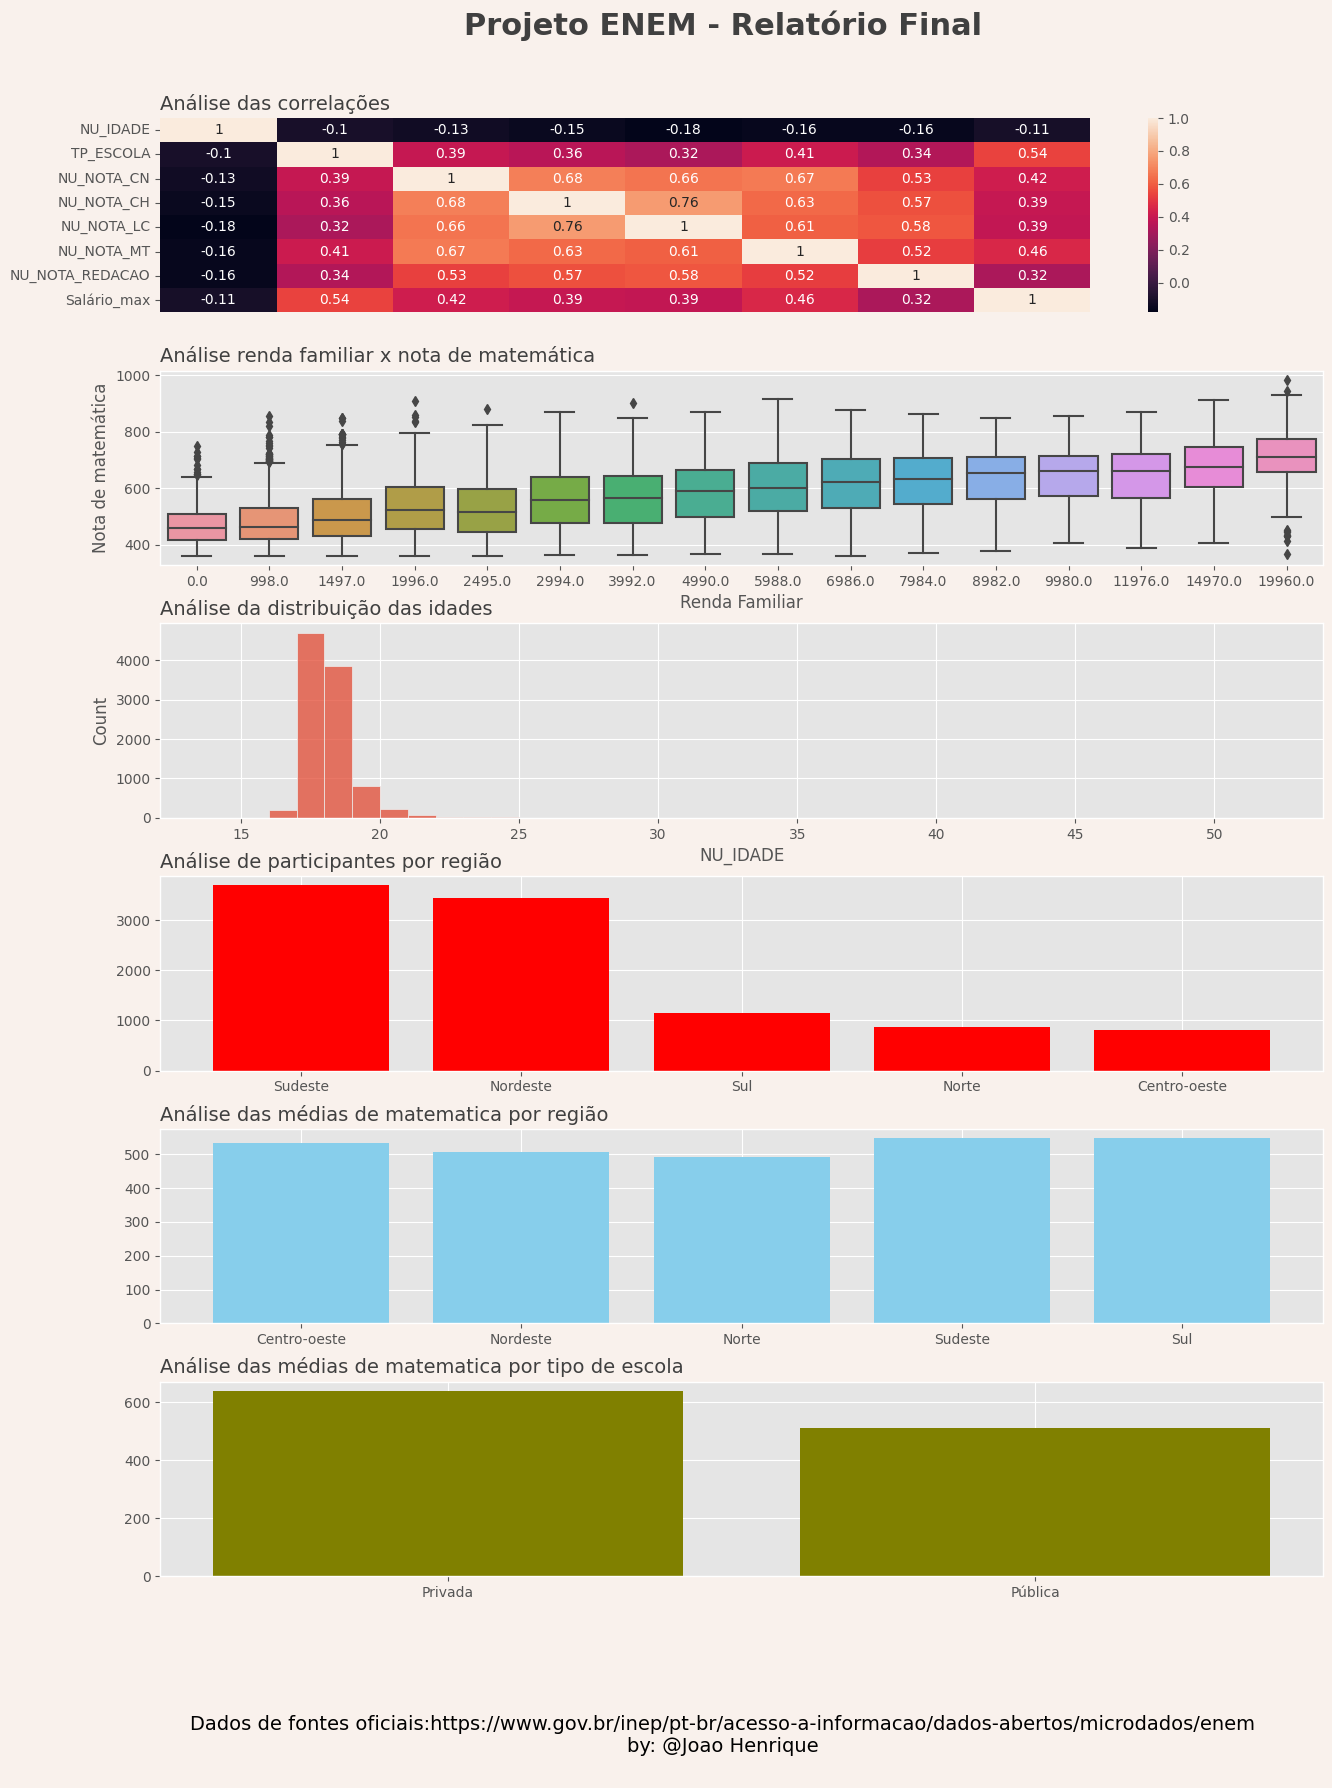

In [ ]:
# Tamanho do relatório
figura, eixo = plt.subplots(figsize=(15,18))

#Cor de fundo

cor_fundo = '#f9f1ec'
eixo.set_facecolor(cor_fundo)
figura.set_facecolor(cor_fundo)

# Paleta de cores
paleta_cores = sns.color_palette('flare',7)

# Estilo no gráfico
plt.style.use('ggplot')

#Titulo
plt.suptitle('Projeto ENEM - Relatório Final',
             fontsize=22,color='#404040', fontweight=600)

#Estrutura
linhas = 6
colunas = 1



#1°Análise HeatMAP dos dados
plt.subplot(linhas,colunas, 1)
plt.title('Análise das correlações', loc = 'left', fontsize=14,color='#404040')
sns.heatmap(correlacao, annot=True, xticklabels=False);

#2°Análise -  Boxplot relacionando salario com nota de matemática
plt.subplot(linhas,colunas, 2)
plt.title('Análise renda familiar x nota de matemática', loc = 'left', fontsize=14,color='#404040')
sns.boxplot(data=base_cruzada, x ='Salário_max', y ='NU_NOTA_MT')
plt.xlabel('Renda Familiar')
plt.ylabel('Nota de matemática');

#3° Análise Distribuição das idades
plt.subplot(linhas,colunas, 3)
plt.title('Análise da distribuição das idades', loc = 'left', fontsize=14,color='#404040')
sns.histplot(data=base_cruzada, x = 'NU_IDADE', binwidth=1);

#4°Analise por participantes região
plt.subplot(linhas,colunas, 4)
plt.title('Análise de participantes por região', loc = 'left', fontsize=14,color='#404040')
plt.bar(analise_regiao.index, analise_regiao, color='red')

#5°Analise região x média notas
plt.subplot(linhas,colunas, 5)
plt.title('Análise das médias de matematica por região', loc = 'left', fontsize=14,color='#404040')
plt.bar(analise_media.index, analise_media, color='skyblue')

#6°Analise tipo de escola x média notas
plt.subplot(linhas,colunas, 6)
plt.title('Análise das médias de matematica por tipo de escola', loc = 'left', fontsize=14,color='#404040')
plt.bar(analise_escola.index, analise_escola, color='olive')

#Rodapé

rodape='''
Dados de fontes oficiais:https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem
by: @Joao Henrique
'''

figura.text(0.5, 0.00, rodape, ha='center', size=14);

#Ajuste de layout

plt.subplots_adjust(top=0.92, hspace=0.3);

# **5. Avaliação e conclusão**

Ao longo de todo o projeto, fomos obtendo insights pontuais procurando responder com os dados as duas perguntas feitas no primeiro tópico que são:

*a) Como a renda, escolaridade, idade e região interferem na nota?*

*b) Qual dessas características está mais atrelada ao bom desempenho no exame?*


Após todos os insights, finalizamos nosso projeto com um relatório final e conseguimos concluir que quando temos dados gerais e sabemos por onde começar, uma das melhores opções é utilizar o HEATMAP (mapa de correlação), pois conseguimos observar que as notas, principalmente de matemática, tem maior correlação com a renda e em seguida, a escolaridade.
Logo após, selecionamos uma nota de referência para facilitar a nossa conclusão evitando análises redundantes, com isso utilizamos a análise em BLOXPLOT para selecionar a melhor nota com o critério **maior desvio relacionado a renda**, sendo assim chegamos na **nota de matemática**.
Depois, utilizamos essa nota para as demais análises, onde pudemos observar que **idade** (histograma) e **região** (gráfico de barra) não interferem significamente nas notas, pois a idade tem baixa variação e a região está com médias homogêneas, e referente a escolaridade (gráfico de barra) encontramos um desempenho relevante em quem estuda em escola particular. De todos as itens, a renda é a que mais se correlaciona com o desempenho dos alunos, quanto maior a renda, maior a nota.

